In [1]:
import os
import torch
from trainers.torch.networks import SplitValueSharedActorCritic
from mlagents_envs.base_env import ObservationSpec, DimensionProperty, ObservationType
from mlagents.trainers.settings import NetworkSettings, TrainerSettings
from mlagents_envs.base_env import ActionSpec
from trainers.policy.torch_policy import TorchPolicy
from mlagents_envs.base_env import BehaviorSpec

In [2]:
load_path = "/home/rmarr/Projects/visibility-game-env/results/dcnew1/Seeker/checkpoint.pt"
saved_state_dict = torch.load(load_path)

In [ ]:
saved_state_dict.keys()

dict_keys(['Policy', 'global_step', 'Optimizer:value_optimizer', 'Optimizer:critic'])

In [4]:
saved_state_dict

{'Policy': OrderedDict([('version_number', tensor([3.])),
              ('is_continuous_int_deprecated', tensor([0.])),
              ('continuous_act_size_vector', tensor([0.])),
              ('discrete_act_size_vector', tensor([[5.]])),
              ('act_size_vector_deprecated', tensor([5.])),
              ('memory_size_vector', tensor([0.])),
              ('network_body._body_endoder.seq_layers.0.weight',
               tensor([[ 0.3912, -0.1709,  0.0090,  ...,  0.0338,  0.1949, -0.0321],
                       [ 0.3224, -0.3372,  0.2157,  ..., -0.2921,  0.1944,  0.5522],
                       [ 0.0451,  0.3924,  0.5201,  ..., -0.5478,  0.2909,  0.2346],
                       ...,
                       [-0.3864, -0.0814, -0.1681,  ..., -0.3808,  0.3635, -0.9330],
                       [-0.0454, -0.4686, -0.3059,  ..., -0.0025, -0.1538,  0.1628],
                       [-0.3202, -0.2971, -0.0257,  ..., -0.0828,  0.5597,  0.0178]])),
              ('network_body._body_endoder

In [5]:
seed = 5404
observation_specs = [ObservationSpec(
            name="position_observation",
            shape=(12,),  # 3D vector
            dimension_property=(DimensionProperty.NONE,),  # Must be a tuple
            observation_type=ObservationType.DEFAULT
        )]
action_spec = ActionSpec(
    continuous_size=0,
    discrete_branches=(5,)
)
behavior_spec = BehaviorSpec(
    observation_specs=observation_specs,
    action_spec=action_spec
)
trainer_settings = TrainerSettings(
    dual_critic=True
)
# position_obs_spec = [ObservationSpec(
#             name="position_observation",
#             shape=(3,),  # 3D vector
#             dimension_property=(DimensionProperty.NONE,),  # Must be a tuple
#             observation_type=ObservationType.DEFAULT
#         )]
# crumbs_obs_spec = [ObservationSpec(
#             name="crumbs_observation",
#             shape=(9,),  # 3D vector
#             dimension_property=(DimensionProperty.NONE,),  # Must be a tuple
#             observation_type=ObservationType.DEFAULT
#         )]

network_settings = NetworkSettings(
    deterministic=False,
    memory=None,
    hidden_units=128,
    num_layers=2,
)

stream_names = ["default"]
conditional_sigma = False
tanh_squash = False
load_critic_only = "position_only"

In [6]:
policy = TorchPolicy(
    seed=seed,
    behavior_spec=behavior_spec,
    trainer_settings=trainer_settings,
    tanh_squash=False,
    separate_critic=True,
    condition_sigma_on_obs=False,
    load_critic_only='default'
)

In [7]:
modules = policy.get_modules()

In [8]:
modules['Policy'].load_state_dict(saved_state_dict['Policy'])

<All keys matched successfully>

In [9]:
# for name, mod in modules.items():
#     try:
#         if isinstance(mod, torch.nn.Module):
#             missing_keys, unexpected_keys = mod.load_state_dict(
#                 saved_state_dict[name], strict=False
#             )
#             if missing_keys:
#                 print(
#                     f"Did not find these keys {missing_keys} in checkpoint. Initializing."
#                 )
#             if unexpected_keys:
#                 print.warning(
#                     f"Did not expect these keys {unexpected_keys} in checkpoint. Ignoring."
#                 )
#         else:
#             # If module is not an nn.Module, try to load as one piece
#             mod.load_state_dict(saved_state_dict[name])

#     # KeyError is raised if the module was not present in the last run but is being
#     # accessed in the saved_state_dict.
#     # ValueError is raised by the optimizer's load_state_dict if the parameters have
#     # have changed. Note, the optimizer uses a completely different load_state_dict
#     # function because it is not an nn.Module.
#     # RuntimeError is raised by PyTorch if there is a size mismatch between modules
#     # of the same name. This will still partially assign values to those layers that
#     # have not changed shape.
#     except (KeyError, ValueError, RuntimeError) as err:
#         print(f"Failed to load for module {name}. Initializing")
#         print(f"Module loading error : {err}")    

In [10]:
inputs = []
for y in range(-9, 11, 1):
    for x in range(-9, 11, 1):
        inputs.append([x-0.5, 0.5, y-0.5])
inputs = [torch.tensor(inputs)]

In [11]:
len(inputs[0])

400

In [12]:
policy.actor.critic_pass_position([torch.tensor([[8.5, 0.5, 2.5]])])[0]['extrinsic']

tensor([-0.1239], grad_fn=<SqueezeBackward1>)

In [13]:
vals = policy.actor.critic_pass_position(inputs)[0]['extrinsic']
vals

tensor([-1.3126e+00, -1.2632e+00, -1.2150e+00, -1.1687e+00, -1.1216e+00,
        -1.0741e+00, -1.0325e+00, -1.0000e+00, -9.7639e-01, -9.6166e-01,
        -9.5603e-01, -9.5928e-01, -9.7365e-01, -9.9761e-01, -1.0256e+00,
        -1.0535e+00, -1.0778e+00, -1.0967e+00, -1.1097e+00, -1.1166e+00,
        -1.2240e+00, -1.1733e+00, -1.1239e+00, -1.0760e+00, -1.0296e+00,
        -9.8165e-01, -9.3656e-01, -9.0002e-01, -8.7365e-01, -8.5729e-01,
        -8.5141e-01, -8.5623e-01, -8.7325e-01, -8.9922e-01, -9.2782e-01,
        -9.5422e-01, -9.7497e-01, -9.8923e-01, -9.9722e-01, -9.9999e-01,
        -1.1365e+00, -1.0846e+00, -1.0337e+00, -9.8418e-01, -9.3661e-01,
        -8.8945e-01, -8.4183e-01, -8.0088e-01, -7.7091e-01, -7.5255e-01,
        -7.4641e-01, -7.5311e-01, -7.7292e-01, -8.0051e-01, -8.2856e-01,
        -8.5170e-01, -8.6775e-01, -8.7714e-01, -8.8008e-01, -8.6985e-01,
        -1.0493e+00, -9.9680e-01, -9.4455e-01, -8.9336e-01, -8.4382e-01,
        -7.9622e-01, -7.4798e-01, -7.0272e-01, -6.6

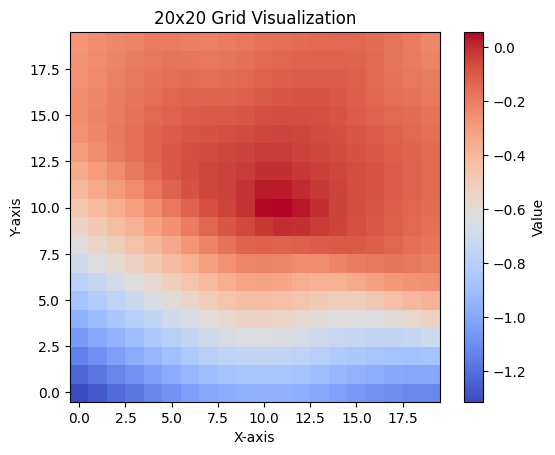

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'vals' is your tensor of 400 values
vals_np = vals.detach().cpu().numpy()  # Convert tensor to numpy array

# Reshape the values into a 20x20 grid
grid = vals_np.reshape((20, 20))

# Create a colormap with a gradient from blue (min) to red (max)
cmap = plt.get_cmap('coolwarm')

# Plot the heatmap
plt.imshow(grid, cmap=cmap, origin='lower')

# Add a color bar to show the scale
plt.colorbar(label='Value')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('20x20 Grid Visualization')

# Show the plot
plt.show()